## 梯度
梯度滤波器或高通滤波器，
1. **Sobel滤波器**：Sobel滤波器是一种常用的梯度滤波器，用于边缘检测和图像梯度计算。它基于Sobel算子，可以计算图像在**水平和垂直方向上的一阶导数**。Sobel滤波器可用于检测边缘的强度和方向。

2. **Scharr滤波器**：Scharr滤波器是一种类似于Sobel滤波器的梯度滤波器，用于图像的边缘检测和梯度计算。相比于Sobel滤波器，Scharr滤波器**具有更好的旋转不变性和更准确的梯度估计**。

3. **Laplacian滤波器**：Laplacian滤波器是一种二阶导数滤波器，用于检测图像中的边缘和图像的二阶梯度。它可以**提取出图像中的高频成分**，对于边缘检测和图像锐化等任务很有用。

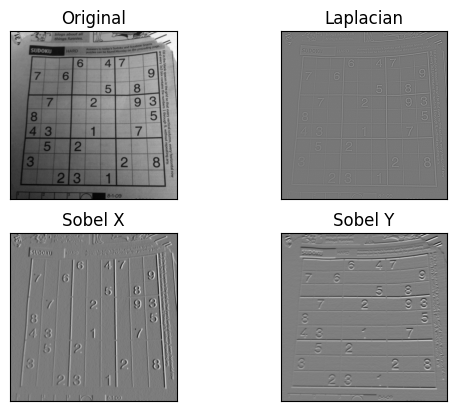

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../data/sudoku.png',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

黑色到白色的过渡被视为正斜率（具有正值），而白色到黑色的过渡被视为负斜率（具有负值）。因此，当您将数据转换为np.uint8时，所有负斜率均​​设为零。
因为uint 所有复值将会被截断,会错过这一边缘信息.  
检测两个边缘，更好的选择是将输出数据类型保留为更高的形式

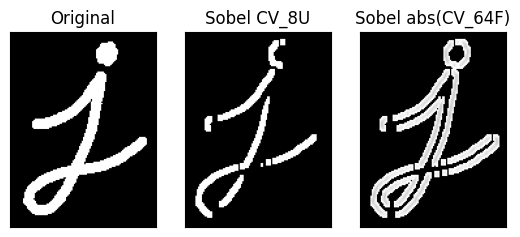

In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../data/j.png',0)
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()